2025-08-27 14:01:50.629586: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1756292515.563792  343408 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1753 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-08-27 14:02:00.344265: I external/local_xla/xla/service/service.cc:163] XLA service 0x720cc8046080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-27 14:02:00.344321: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2025-08-27 14:02:00.489366: I tensorflow/compiler/mlir/tensorflow/utils/dump_ml

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Raw prediction value: 1.0


I0000 00:00:1756292524.784191  343509 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


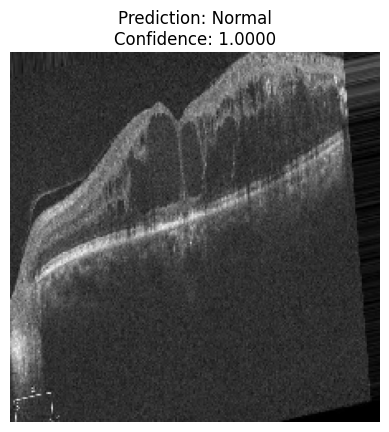

THE UPLOADED OCT IMAGE IS: Normal
Confidence score: 1.0000


In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load your saved model
model = load_model('../models/my_model.h5')  # Update with your actual path

# Load and preprocess the image
img_path = '/mnt/d/PhD_Research/Eyesha/Models/DR_Model_OCT/Ready DR model/DR/dr_test_1001.jpg'
img = load_img(img_path, target_size=(224, 224))
imag = img_to_array(img)
imag = imag / 255.0  # Normalize to [0,1] if your model expects this
imaga = np.expand_dims(imag, axis=0) 

# Make prediction
ypred = model.predict(imaga)

# Since you're using binary classification with sigmoid output
# ypred will be a single value between 0-1, not a probability distribution
print(f"Raw prediction value: {ypred[0][0]}")


# For binary classification with sigmoid output
if ypred[0][0] > 0.5:
    op = "Normal"
else:
    op = "DR"

# Display results
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {op}\nConfidence: {ypred[0][0]:.4f}")
plt.show()

print("THE UPLOADED OCT IMAGE IS: " + op)
print(f"Confidence score: {ypred[0][0]:.4f}")

In [4]:
print(imag.shape)

(224, 224, 3)
